In [97]:
import json
from time import time
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
import vaderSentiment
% matplotlib inline

In [2]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [36]:
def make_it_pretty():
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')      

In [53]:
# Combined all the csv files, no need to redo because a pickle of a dataframe is included
fps = ["articles1.csv", "articles2.csv", "articles3.csv"]
allthenews = "C:/Users/forresthooton/Downloads/"


atn = pd.DataFrame()

for fp in fps:
    atn = pd.concat([atn, pd.read_csv(allthenews+fp)], axis = 0, ignore_index = True)

atn = atn.drop('Unnamed: 0', axis=1).reset_index(drop=True)

In [22]:
# This was to combine the file origionally, no need to redo
#atn.to_pickle('all_the_news.pkl')
atn = pd.read_pickle('src/all_the_news.pkl')

In [1]:
#atn

In [21]:
print('# of authors in all the news', len(atn.author.drop_duplicates()))

# of authors in all the news 3604


In [56]:
atn.year.drop_duplicates()

0         2016.0
1         2017.0
2532      2014.0
5631      2015.0
17077     2013.0
32077     2012.0
38656     2011.0
57140        NaN
57718     2004.0
61607     2008.0
62169     2003.0
62954     2007.0
71798     2005.0
96092     2010.0
97035     2009.0
105029    2000.0
Name: year, dtype: float64

In [57]:
atn.columns

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')

In [58]:
# % title lengths unique
len(atn.title.drop_duplicates()) / len(atn.title)

0.9969348390264432

In [5]:
atn['text_length'] = atn.content.str.split().apply(len)

In [6]:
print(atn.text_length.mean())
print(atn.text_length.median())

741.4551027565407
592.0


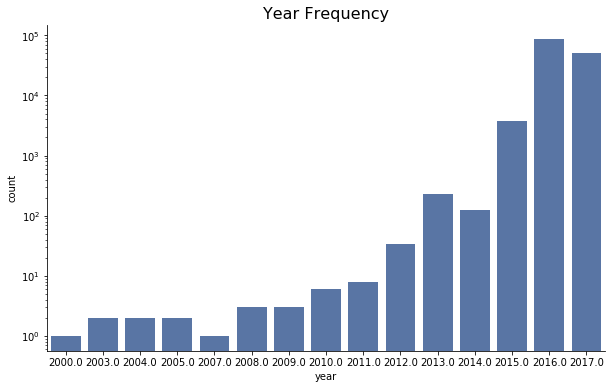

In [23]:
plt.subplots(figsize=(10,6))
sns.set_color_codes(palette='deep')
ax = sns.countplot(atn.year, color='b')
ax.set_title('Year Frequency', fontsize = 16)
ax.set_yscale('log')
make_it_pretty()

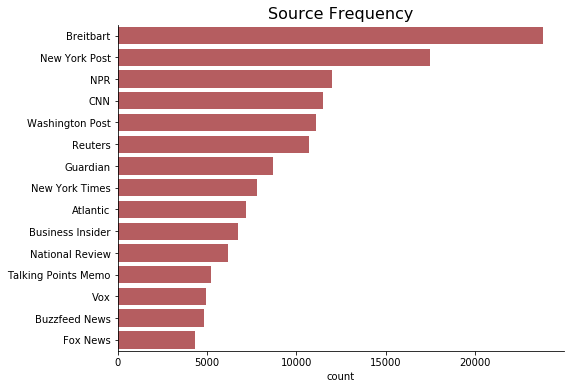

In [21]:
plt.subplots(figsize=(8,6))
viz_data = atn.publication.value_counts()
ax = sns.barplot(y = viz_data.index, x = viz_data, orient='h', color='r')
ax.set_title('Source Frequency', fontsize = 16)
ax.set_xlabel('count')
make_it_pretty()

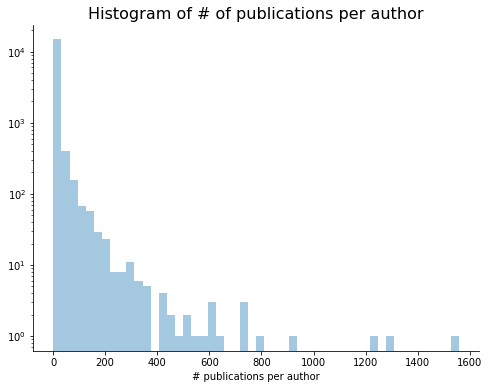

In [27]:
plt.subplots(figsize=(8,6))
viz_data = atn.author.value_counts()
ax = sns.distplot(viz_data, kde=False)
ax.set_title('Histogram of # of publications per author', fontsize=16)
ax.set_yscale('log')
ax.set_xlabel('# publications per author')
make_it_pretty()

In [8]:
#for i in range(15):
#    print(atn.content[i])
#    print()

## In progress

In [145]:
def reload_custom_modules():
    import importlib
    import src.text_processing
    import src.config
    import src.similarity
    import src.testfile
    import src.network
    import src.sentiment
    importlib.reload(src.text_processing)
    importlib.reload(src.config)
    importlib.reload(src.similarity)
    importlib.reload(src.testfile)
    importlib.reload(src.network)
    importlib.reload(src.sentiment)
    
reload_custom_modules()

In [100]:
d = src.text_processing.Data(directory_path='src/') # Created the data object with the appropriate folder extension
d.get_processed_data() # the object with the data is d.pdata (processed data)

Int64Index([ 41706,  41428, 140223,  23742,  62103, 141126, 142245,  80724,
            137712, 122666,
            ...
            122401,  13253,  52536, 104570,  68351,  28769,  69135,   2857,
            100037,  18583],
           dtype='int64', length=7128)

In [43]:
d.vader_polarity() # Gets the vader sentiment for the words

0 in 0.00012654463450113932 min
Projected time to 42771: 12.896462752342224 min
10000 in 3.095555929342906 min
20000 in 6.230183561642964 min
30000 in 9.719380223751068 min
40000 in 13.353742635250091 min


In [5]:
d.filter_by_sentiment() # Filters words by the set sentiment in the config file

In [26]:
d.stem_vocab()

Stemming and lemmatization done in 0.6176874359448751 min


In [44]:
rounded_composites = [round(c['compound'], 1) for j in d.vader_list for c in j]

0.573737911383311 min


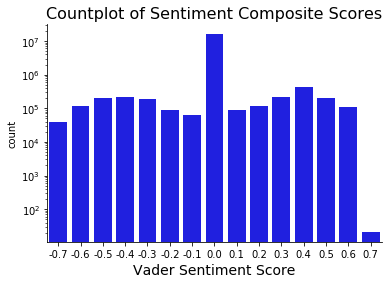

In [45]:
start = time()

ax = sns.countplot(rounded_composites, color='b')
ax.set_yscale('log')
ax.set_title('Countplot of Sentiment Composite Scores', fontsize=16)
ax.set_xlabel('Vader Sentiment Score', fontsize = 14)
make_it_pretty()
print((time() - start)/60, 'min')

0.053912707169850665 min


In [18]:
rounded_composites = [round(c, 1) for c in composites]

In [70]:
print(num_intense_n / len(temp[0].split()), num_intense_p / len(temp[0].split()))

0.020361990950226245 0.014705882352941176


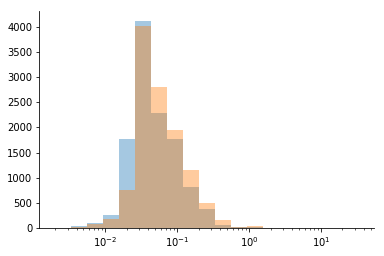

In [40]:
import numpy as np

LogMinn, LogMaxn = np.log10(min(neg_perc)),np.log10(max(neg_perc))
newBinsn = np.logspace(LogMinn, LogMaxn,20)
d1 = sns.distplot(neg_perc, kde=False, bins=newBins)

LogMinp, LogMaxp = np.log10(min(pos_perc)),np.log10(max(pos_perc))
newBinsp = np.logspace(LogMinp, LogMaxp,20)
sns.distplot(pos_perc, kde=False, bins=newBinsn)

d1.set_xscale('log')
make_it_pretty()

0.3882918278376261 min


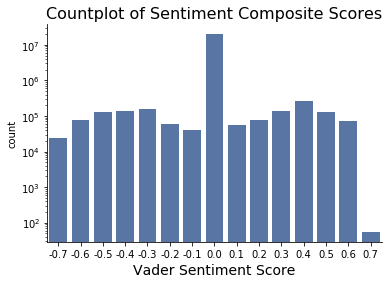

In [24]:
start = time()

ax = sns.countplot(rounded_composites, color='b')
ax.set_yscale('log')
ax.set_title('Countplot of Sentiment Composite Scores', fontsize=16)
ax.set_xlabel('Vader Sentiment Score', fontsize = 14)
make_it_pretty()
print((time() - start)/60, 'min')

In [102]:
import importlib
import src.text_processing
importlib.reload(src.text_processing)
importlib.reload(src.config)

<module 'src.config' from 'C:\\Users\\forresthooton\\Documents\\Masters Classes\\Unsupervised Machine Learning\\Project\\literarystyle\\src\\config.py'>

In [58]:
x = d.stemmer.stem('hatred')
d.lmtzr.lemmatize(x)

'hatr'

In [85]:
#filter by %
#filtered = [[i['word'] for i in j if abs(i['compound']) < .6] for j in d.vader_list]
d.filter_by_sentiment()

In [56]:
temp = pd.read_table("NRC-Affect-Intensity-Lexicon/NRC-AffectIntensity-Lexicon.txt")
fcn = lambda x: d.lmtzr.lemmatize(d.stemmer.stem(x))
temp.term = temp.term.map(fcn)
temp

,term,score,AffectDimension
0,outrag,0.964,anger
1,brutal,0.959,anger
2,hatr,0.953,anger
3,hate,0.940,anger
4,terror,0.939,anger
5,infuri,0.938,anger
6,violent,0.938,anger
7,furious,0.929,anger
8,enrag,0.927,anger
9,furious,0.927,anger


In [150]:
reload_custom_modules()
data = src.text_processing.Data(directory_path='src/')
data.get_processed_data()
data.vader_polarity()

Simple splitting done in: 0.4569825013478597 min
0 in 8.349021275838216e-05 min
Projected time to 7128: 2.5422770719528196 min


In [147]:
# Full basic pipeline
reload_custom_modules()

data = src.text_processing.Data(directory_path='src/')
data.get_processed_data()
data.stem_vocab()
sim_matrix = src.similarity.cosine_sim_matrix(data.pdata)
edgelist = src.network.similarity_to_edgelist(sim_matrix.A, labels = data.labels) # Need .A to change sim_matrix from sparse matrix form

Simple splitting done in: 0.3679353992144267 min
Stemming and lemmatization done in 1.5865953803062438 min


In [129]:
reload_custom_modules()

src.network.tune_sim_thresh(sim_matrix.A, .3)

decrease: 0.9996657205053785
0 loops in 0.09643681049346924 min
Upper bound: 0.33    Lower bound: 0.26999999999999996    Current: 0.00011031223322509979
decrease: 0.9927313894472501
1 loops in 0.1905201236406962 min
Upper bound: 0.33    Lower bound: 0.26999999999999996    Current: 0.002398641482407443
decrease: 0.9232709259524344
2 loops in 0.29302089611689247 min
Upper bound: 0.33    Lower bound: 0.26999999999999996    Current: 0.02532059443569663
decrease: 0.599462062453135
3 loops in 0.4397868355115255 min
Upper bound: 0.33    Lower bound: 0.26999999999999996    Current: 0.13217751939046546
increase: 0.03225352919578561
4 loops in 0.6319368362426758 min
Upper bound: 0.33    Lower bound: 0.26999999999999996    Current: 0.2789986924732727
Number of loops to converge: 5
Converged in 0.6319542090098064 min


0.04824915165425722

In [151]:
data.vader_analyzer.polarity_scores('cnn')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [155]:
reload_custom_modules()

data = src.text_processing.Data(directory_path='src/')
data.get_processed_data()
data.vader_polarity()
data.filter_neutral_sent()

Simple splitting done in: 0.21414653857549032 min
0 in 0.0002833247184753418 min
Projected time to 7128: 1.2438832197189333 min
